In [4]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

In [5]:
indir_track_cascade = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/track_mu_Burnsample_RD_Full_db.csv"
indir_energy = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/energy_Burnsample_RD_Full_db.csv"
indir_zenith = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/zenith_Burnsample_RD_Full_db.csv"
indir_azimuth = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/azimuth_Burnsample_RD_Full_db.csv"
indir_multiclass = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/pid_Burnsample_RD_Full_db.csv"



In [6]:
track_cascade = pd.read_csv(indir_track_cascade).sort_values('event_no').reset_index(drop = True)
#energy = pd.read_csv(indir_energy).sort_values('event_no').reset_index(drop = True)
#zenith = pd.read_csv(indir_zenith).sort_values('event_no').reset_index(drop = True)
azimuth = pd.read_csv(indir_azimuth).sort_values('event_no').reset_index(drop = True)
multiclass = pd.read_csv(indir_multiclass).sort_values('event_no').reset_index(drop = True)

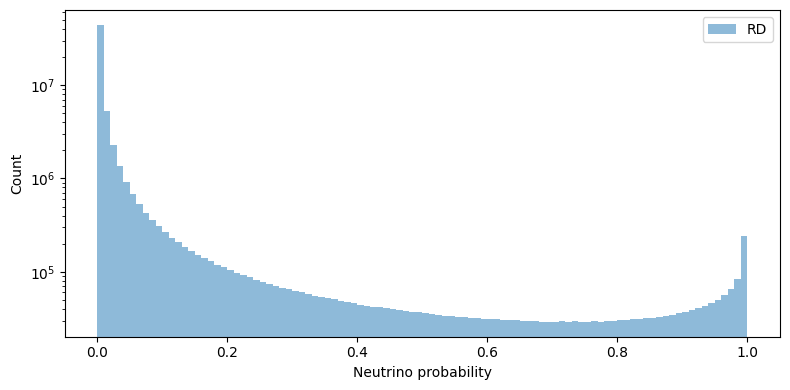

In [7]:
fig, axs = plt.subplots(figsize=(8, 4))

hist = axs.hist(multiclass['pid_neutrino_pred'],bins=100,alpha=0.5,label='RD')

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()

In [8]:
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

In [10]:
safe_load_place = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
load_logit = True
if load_logit:
    input = pd.read_csv(safe_load_place)
    multiclass['pid_neutrino_pred_logit'] = input['pid_neutrino_pred']
else:
    neutrino_prob_logit_RD = pd.Series(multiclass['pid_neutrino_pred']).apply(to_logit)

In [11]:
#multiclass['pid_neutrino_pred_logit'] = neutrino_prob_logit_RD

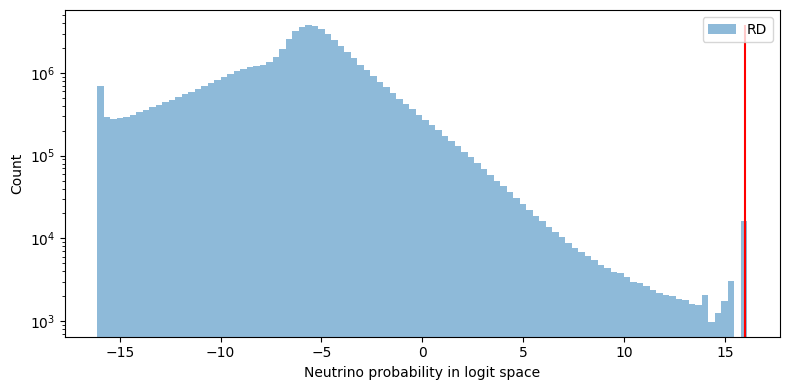

In [12]:
cut = 16

fig, axs = plt.subplots(figsize=(8, 4))

hist = axs.hist(multiclass['pid_neutrino_pred_logit'],bins=100,alpha=0.5,label='RD')

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability in logit space')
axs.vlines(cut,0,max(hist[0]),'red')
axs.legend()

fig.tight_layout()

In [13]:
clean_neutrino_selection_RD = multiclass['event_no'][multiclass['pid_neutrino_pred_logit'] > cut]
print('there are this many neutrinos in RD above the cut: ',len(clean_neutrino_selection_RD))
print('out of this many events in total: ',len(multiclass))

there are this many neutrinos in RD above the cut:  16145
out of this many events in total:  61739862


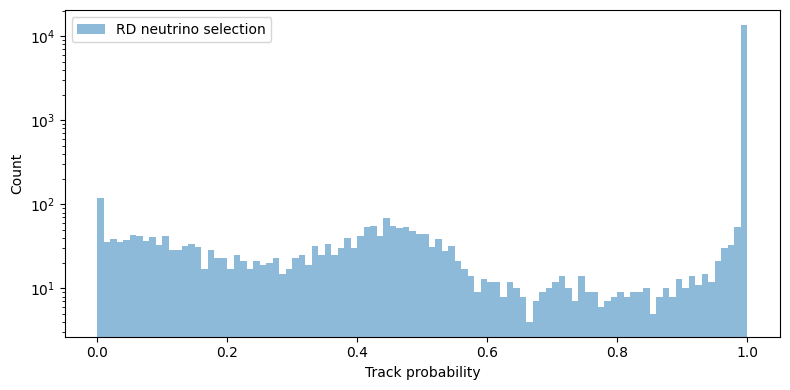

In [14]:

fig, axs = plt.subplots(figsize=(8, 4))

hist = axs.hist(track_cascade['track_mu_pred'][track_cascade['event_no'].isin(clean_neutrino_selection_RD)],bins=100,alpha=0.5,label='RD neutrino selection')

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Track probability')
#axs.vlines(cut,0,max(hist[0]),'red')
axs.legend()

fig.tight_layout()

In [15]:
cut = 0.9
pure_neutrino_track_selection = track_cascade['event_no'][track_cascade['track']]

KeyError: 'track'

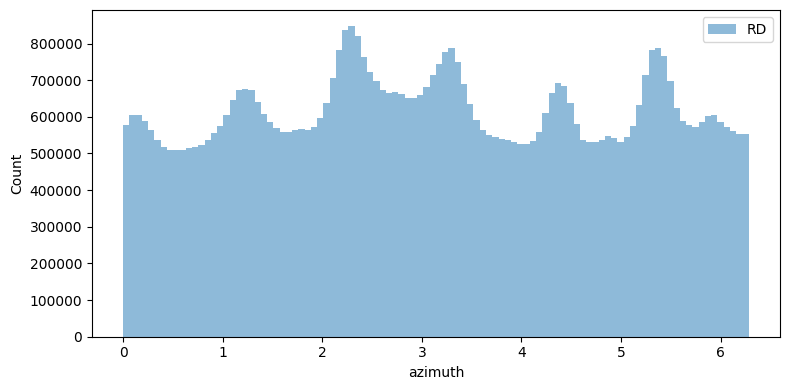

In [ ]:
fig, axs = plt.subplots(figsize=(8, 4))

hist = axs.hist(azimuth['azimuth_pred'],bins=100,alpha=0.5,label='RD')

#axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('azimuth')
axs.legend()

fig.tight_layout()

fig, axs = plt.subplots(figsize=(8, 4))

hist = axs.hist(zenith['zenith_pred'],bins=100,alpha=0.5,label='RD')

#axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('zenith')
axs.legend()

fig.tight_layout()

fig, axs = plt.subplots(figsize=(8, 4))

hist = axs.hist(np.log10(energy['energy_pred']),bins=100,alpha=0.5,label='RD')

#axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Energy Log10 GeV')
axs.legend()

fig.tight_layout()

In [ ]:
print(len(azimuth))

61739862
